In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from loaders import load_all_videos

%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
vids = load_all_videos()
vids

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,is_GB,is_US
0,0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,True,False
1,1,3s1rvMFUweQ,17.14.11,Taylor Swift: ‚Ä¶Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs ‚Ä¶Ready f...,True,False
2,2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyonc√©,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyonc√© ...,True,False
3,3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,True,False
4,4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73364,40943,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,NaN,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",False,True
73365,40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,NaN,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,False,True
73366,40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,NaN,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,False,True
73367,40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,NaN,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,False,True


# Titles

In [3]:
titles = vids.groupby('video_id').first()[['title']]
titles

,title
video_id,
--uXQQ0h-yQ,Paul McCartney - Pipes of Peace
-0CMnp02rNY,Mindy Kaling's Daughter Had the Perfect Reacti...
-0NYY8cqdiQ,Megan Mullally Didn't Notice the Interesting P...
-1Hm41N0dUs,Cast of Avengers: Infinity War Draws Their Cha...
-1yT-K3c6YI,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...
...,...
zxUwbflE1SY,100 People Hold Their Breath for as Long as Th...
zxjv0lo8bU8,MARCELO's son ENZO shows off his skills in the...
zxwfDlhJIpw,kanye west / charlamagne interview


## Hand-crafted features

In [103]:
import re
from nltk.tokenize.casual import casual_tokenize

def num_words(text):
    return len(casual_tokenize(text))

def num_uppercase_words(text):
    pattern = r'\b[A-Z]+\b'
    return len(re.findall(pattern, text))

def num_repeated_letters(text):
    pattern = r'\b\w*(\w)\1{2,}\w*\b'
    return len(re.findall(pattern, text))

def num_question_marks(text):
    return text.count('?')

def num_exclamation_marks(text):
    return text.count('!')

def num_periods(text):
    return text.count('.')

def num_numbers(text):
    pattern = '\d+'
    return len(re.findall(pattern, text))

def num_hashtags(text):
    pattern = '#\w+'
    return len(re.findall(pattern, text))

features = [
    num_words, num_uppercase_words, num_question_marks, num_exclamation_marks, num_periods,
    num_numbers, num_hashtags
]

for func in features:
    titles[func.__name__] = titles['title'].apply(func)

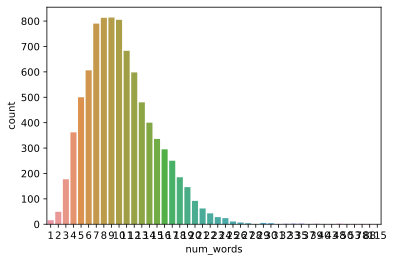

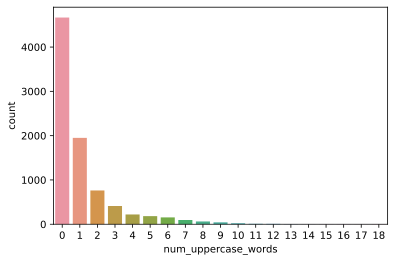

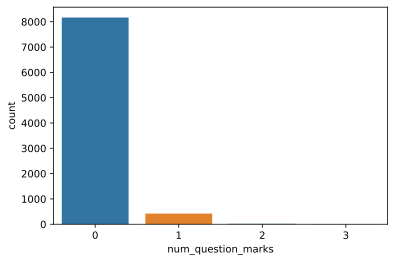

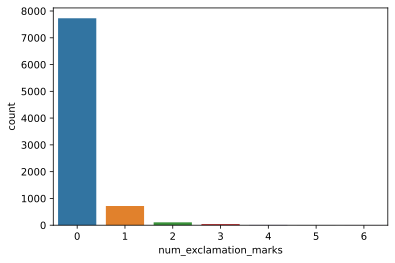

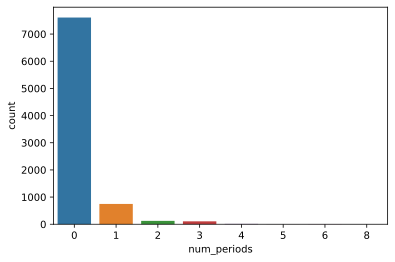

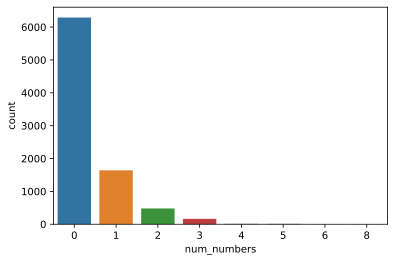

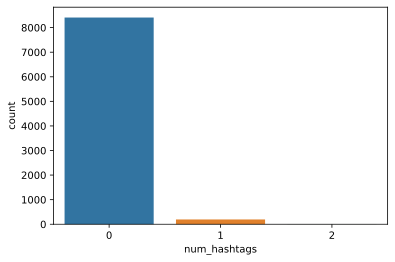

In [122]:
for func in features:
    column = func.__name__
    sns.countplot(titles[column])
    plt.show()

In [124]:
## Sentiment analysis

## tags

In [13]:
def parse_tags(value):
    if value == '[none]':
        return []
    return[tag.strip('"') for tag in value.split('|')]

vids['tags'] = vids['tags'].apply(parse_tags)